# Statistics in Julia

Julia has been used by mathematicians primarily over its history and therefore has a rich mathematic ecosystem

In [32]:
using Distributions

## Distributions.jl

Used to generate data according to distributions (as seen in the previous section) or to fit distributions to data

In [33]:
using DataFrames, RDatasets
iris = dataset("datasets", "iris");

We can use Maximum Likelihood Estimation to fit a distribution

In [34]:
X = iris[:SepalLength]
d = fit_mle(Normal, X)

Normal{Float64}(μ=5.843333333333335, σ=0.8253012917851409)

To compare the result, we can generate data from this distribution and calculate the mean squared error.

In [35]:
y = rand(d, length(X));
sum((X .- y).^2)

180.43261776491047

In [36]:
using GLM

## GLM.jl

Generalized Linear Models for linear regression. We'll look at ordinary least squares regression

In [37]:
species = unique(iris[:Species])
iris[:Sind] = [indexin([i], species)[1] for i in iris[:Species]]
head(iris)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species,Sind
,Float64,Float64,Float64,Float64,Categorical…,Int64
1,5.1,3.5,1.4,0.2,setosa,1
2,4.9,3.0,1.4,0.2,setosa,1
3,4.7,3.2,1.3,0.2,setosa,1
4,4.6,3.1,1.5,0.2,setosa,1
5,5.0,3.6,1.4,0.2,setosa,1
6,5.4,3.9,1.7,0.4,setosa,1


In [38]:
ols = lm(@formula(Sind ~ PetalWidth), iris)

StatsModels.DataFrameRegressionModel{LinearModel{LmResp{Array{Float64,1}},DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

Formula: Sind ~ 1 + PetalWidth

Coefficients:
             Estimate Std.Error t value Pr(>|t|)
(Intercept)  0.767001 0.0365708 20.9731   <1e-45
PetalWidth    1.02807 0.0257596 39.9102   <1e-80


In [39]:
stderror(ols)

2-element Array{Float64,1}:
 0.036570760522212836
 0.02575959315195414 

# Machine Learning

As with the previous section, we'll look at some, but not all, popular machine learning packages in Julia. This part of the ecosystem is under heavy active development currently and could use more full-Julia options.

In [40]:
using LossFunctions

## LossFunctions.jl

Provides a variety of loss functions for classification and regression tasks



In [41]:
h = predict(ols)
h[1:10]

10-element Array{Float64,1}:
 0.97261481853977  
 0.97261481853977  
 0.97261481853977  
 0.97261481853977  
 0.97261481853977  
 1.1782289309067273
 1.0754218747232487
 0.97261481853977  
 0.97261481853977  
 0.8698077623562915

In [42]:
sum(value(LogitDistLoss(), iris[:Sind], h))

2.107057372318687

In [43]:
using DecisionTree

## DecisionTree.jl

Provides Decision Trees and Random Forests, with a scikit-learn based API

In [44]:
features = convert(Array, iris[1:4])
labels = string.(iris[:Species])
model = DecisionTreeClassifier(max_depth=2)

DecisionTreeClassifier
max_depth:                2
min_samples_leaf:         1
min_samples_split:        2
min_purity_increase:      0.0
pruning_purity_threshold: 1.0
n_subfeatures:            0
classes:                  root:                     

nothing
nothing

In [45]:
DecisionTree.fit!(model, features, labels)
print_tree(model)

Feature 3, Threshold 2.45
L-> setosa : 50/50
R-> Feature 4, Threshold 1.75
    L-> versicolor : 49/54
    R-> virginica : 45/46


In [46]:
y = DecisionTree.predict(model, features);
sum(y .!= iris[:Species])

6

In [47]:
using Gadfly

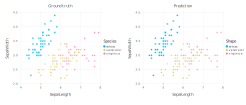

In [48]:
p1 = plot(iris, x="SepalLength", y="SepalWidth", color="Species", shape="Species", Geom.point, 
    Guide.title("Ground truth"));
p2 = plot(iris, x="SepalLength", y="SepalWidth", color=y, shape=y, Geom.point, Guide.title("Prediction"));
set_default_plot_size(700pt, 300pt)
hstack(p1, p2)

## Deep Learning

Multiple new options being actively developed
+ Mocha.jl
+ Knet.jl
+ Flux.jl
+ Tensorflow.jl (wrapper of Python)

In [ ]:
using Flux

model = Chain(
  Dense(768, 128, σ),
  LSTM(128, 256),
  LSTM(256, 128),
  Dense(128, 10),
  softmax)

loss(x, y) = crossentropy(model(x), y)

Flux.train!(loss, data, ADAM(...))

# Database Interaction

C wrappers and full Julia implementations for many databases, such as
+ SQLite.jl
+ MySQL.jl
+ Mongo.jl
+ LibPQ.jl

# Thank you!

https://github.com/d9w/julia_presentation.git